In [1]:
import pandas as pd

In [2]:
df_inat = pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/3809163833.py:1: DtypeWarning: Columns (100,108,110,111,112,114,115,118,121,128,130,136,138,139,140,141,150,152,153,154,156,157,158,159,160,161,162,163,164,165,166,168,169,171,178,180,189,190,191,204,208,211,212,214,215,219,228,229,247,255,256) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inat = pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"')


In [3]:
df_eBird = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/142200405.py:1: DtypeWarning: Columns (9,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eBird = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t')


In [4]:
df_inat.shape

(3321454, 259)

In [5]:
df_eBird.shape

(8694926, 50)

## EDA on Bird Names. Can scientific names be used as a common key?

In [308]:
df_inat.head(10).to_clipboard()

In [7]:
[x for x in df_inat.columns if ('name' in x.lower())]

['datasetName',
 'organismName',
 'scientificNameID',
 'acceptedNameUsageID',
 'parentNameUsageID',
 'originalNameUsageID',
 'nameAccordingToID',
 'namePublishedInID',
 'scientificName',
 'acceptedNameUsage',
 'parentNameUsage',
 'originalNameUsage',
 'nameAccordingTo',
 'namePublishedIn',
 'namePublishedInYear',
 'genericName',
 'vernacularName',
 'acceptedScientificName',
 'verbatimScientificName',
 'typifiedName',
 'level0Name',
 'level1Name',
 'level2Name',
 'level3Name']

In [8]:
name_columns_iNat = [
    'scientificName',
    'species',
    'acceptedScientificName',
    'verbatimScientificName'
]

In [9]:
for col in name_columns_iNat:
    print(f"Unique names in column: {col} is {df_inat[col].nunique()}")

Unique names in column: scientificName is 47112
Unique names in column: species is 40090
Unique names in column: acceptedScientificName is 46022
Unique names in column: verbatimScientificName is 48130


In [309]:
df_eBird.head(10).to_clipboard()

In [11]:
name_columns_eBird = [
    'COMMON NAME',
    'SCIENTIFIC NAME',
]

In [12]:
for col in name_columns_eBird:
    print(f"Unique names in column: {col} is {df_eBird[col].nunique()}")

Unique names in column: COMMON NAME is 865
Unique names in column: SCIENTIFIC NAME is 865


In [13]:
df_eBird.groupby(name_columns_eBird).count()

,,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
COMMON NAME,SCIENTIFIC NAME,,,,,,,,,,,,,,,,,,,,,
Abert's Towhee,Melozone aberti,2011,2011,2011,2011,2011,0,0,0,2011,41,...,2008,2011,924,2011,2011,2011,0,350,137,0
Acanthis/Spinus sp.,Acanthis/Spinus sp.,36,36,36,36,36,0,0,0,36,0,...,34,36,2,36,36,36,0,3,1,0
Accipiter sp.,Accipiter sp.,835,835,835,835,835,0,0,0,835,1,...,834,835,391,835,835,835,0,287,156,0
Acorn Woodpecker,Melanerpes formicivorus,75840,75840,75840,75840,75840,205,205,0,75840,776,...,75517,75840,23095,75840,75840,75840,0,20239,2309,0
African Collared-Dove,Streptopelia roseogrisea,15,15,15,15,15,15,15,15,15,1,...,15,15,6,15,15,15,0,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white egret sp.,Ardea/Egretta/Bubulcus sp.,175,175,175,175,175,0,0,0,175,14,...,174,175,61,175,175,175,0,62,48,0
white-winged gull sp.,Larus sp. (white-winged gull sp.),36,36,36,36,36,0,0,0,36,0,...,36,36,17,36,36,36,0,18,20,0
woodpecker sp.,Picidae sp.,1171,1171,1171,1171,1171,0,0,0,1171,3,...,1162,1171,246,1171,1171,1171,0,278,325,0


In [14]:
df_eBird['TAXON CONCEPT ID'].nunique()

1088

In [15]:
df_eBird.groupby('SCIENTIFIC NAME')['TAXON CONCEPT ID'].nunique().sort_values(ascending=False)

SCIENTIFIC NAME
Junco hyemalis                    9
Melospiza melodia                 8
Loxia curvirostra                 7
Zonotrichia leucophrys            7
Leiothlypis celata                6
                                 ..
Empidonax wrightii/oberholseri    1
Estrilda melpoda                  1
Estrilda troglodytes              1
Euodice malabarica                1
Zosterops sp.                     1
Name: TAXON CONCEPT ID, Length: 865, dtype: int64

In [16]:
df_eBird[df_eBird['SCIENTIFIC NAME'] == "Junco hyemalis"]

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
13559,URN:CornellLabOfOrnithology:EBIRD:OBS693135005,2019-01-15 15:42:12,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,2.0,1,G3765102,0,1,0,NaN,NaN,NaN,NaN
13560,URN:CornellLabOfOrnithology:EBIRD:OBS702682936,2021-11-08 10:25:50.618592,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
13561,URN:CornellLabOfOrnithology:EBIRD:OBS699877239,2019-01-18 16:58:44,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
13562,URN:CornellLabOfOrnithology:EBIRD:OBS695455899,2019-01-07 14:48:19,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,1.0,0,NaN,0,1,0,NaN,NaN,NaN,NaN
13563,URN:CornellLabOfOrnithology:EBIRD:OBS700292385,2019-01-19 17:50:58,32449,species,avibase-05FF3C9B,Dark-eyed Junco,Junco hyemalis,NaN,NaN,NaN,...,3.0,1,NaN,0,1,0,NaN,"warm. partly cloudy. From Dwight way, above tr...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693180,URN:CornellLabOfOrnithology:EBIRD:OBS840057789,2021-04-03 19:08:18.202972,32455,issf,avibase-B1019ACB,Dark-eyed Junco,Junco hyemalis,Dark-eyed Junco (Oregon),Junco hyemalis [oreganus Group],NaN,...,6.0,1,G4766200,0,1,0,NaN,NaN,NaN,NaN
8693181,URN:CornellLabOfOrnithology:EBIRD:OBS852424961,2021-12-29 00:17:07.992279,32455,issf,avibase-B1019ACB,Dark-eyed Junco,Junco hyemalis,Dark-eyed Junco (Oregon),Junco hyemalis [oreganus Group],NaN,...,4.0,1,G4880261,0,1,0,NaN,NaN,NaN,NaN
8693182,URN:CornellLabOfOrnithology:EBIRD:OBS842649454,2019-12-27 12:40:44,32455,issf,avibase-B1019ACB,Dark-eyed Junco,Junco hyemalis,Dark-eyed Junco (Oregon),Junco hyemalis [oreganus Group],NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,NaN
8693183,URN:CornellLabOfOrnithology:EBIRD:OBS852425498,2021-12-29 00:17:07.992279,32455,issf,avibase-B1019ACB,Dark-eyed Junco,Junco hyemalis,Dark-eyed Junco (Oregon),Junco hyemalis [oreganus Group],NaN,...,2.0,1,G4880269,0,1,0,NaN,NaN,NaN,NaN


In [17]:
(df_eBird.groupby('SCIENTIFIC NAME')['TAXON CONCEPT ID'].nunique() > 1).sum()

140

Observations on eBird:
- Only two name columns, 1-1 mapping between them, clearly to use Scientific Name
- There are more Taxon ID than Scientific Name!
- Some Scientific Name have more than one Taxon ID, 140 of those!
- Not the other way around at least! 

In [18]:
df_inat

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,eventType
0,1993720406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.5_1,California,USA.5.56_1,Ventura,NaN,NaN,NE,NaN
1,2006062344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.10_1,Florida,USA.10.28_1,Hillsborough,NaN,NaN,NE,NaN
2,3031816435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.5_1,California,USA.5.40_1,San Luis Obispo,NaN,NaN,LC,NaN
3,2235488964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.11_1,Georgia,USA.11.44_1,DeKalb,NaN,NaN,NE,NaN
4,2236210250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.44_1,Texas,USA.44.152_1,Lubbock,NaN,NaN,LC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321449,2529313761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.5_1,California,USA.5.39_1,San Joaquin,NaN,NaN,LC,NaN
3321450,2540812251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.44_1,Texas,USA.44.246_1,Williamson,NaN,NaN,LC,NaN
3321451,2574273979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.5_1,California,USA.5.30_1,Orange,NaN,NaN,NE,NaN
3321452,3044719228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,USA,United States,USA.51_1,Wyoming,USA.51.20_1,Teton,NaN,NaN,LC,NaN


In [19]:
df_inat['taxonID'].nunique()

49685

In [20]:
rel_columns_iNat = [
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
]
rel_columns_eBird = [
    'TAXON CONCEPT ID',
    'OBSERVATION COUNT',
    'COUNTRY',
    'STATE',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION DATE',
    'SCIENTIFIC NAME',
]

In [21]:
df_iNat2 = df_inat[rel_columns_iNat].copy()
df_eBird2 = df_eBird[rel_columns_eBird].copy()

In [22]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56,Puccinia evadens Harkn.,Puccinia evadens Harkn.
1,84994,5156078.0,US,Florida,28.059126,-82.418194,2019-01-21T14:35:00,"Acanthocephala declivis (Say, 1832)","Acanthocephala declivis (Say, 1832)"
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00,"Sceloporus occidentalis Baird & Girard, 1852","Sceloporus occidentalis Baird & Girard, 1852"
3,53326,3169708.0,US,Georgia,33.769633,-84.30645,2019-03-29T14:33:23,Vinca major L.,Vinca major L.
4,9176,5231132.0,US,Texas,33.562034,-101.809798,2019-04-02T12:44:00,"Zonotrichia leucophrys (J.R.Forster, 1772)","Zonotrichia leucophrys (J.R.Forster, 1772)"


In [23]:
df_iNat2['countryCode'].value_counts()

US    3321452
Name: countryCode, dtype: int64

# eBird Analysis

In [24]:
df_eBird2['COUNTRY'].value_counts()

United States    8694926
Name: COUNTRY, dtype: int64

In [25]:
df_eBird2['STATE'].value_counts()

California    8694926
Name: STATE, dtype: int64

In [26]:
df_eBird2.head()

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,Accipiter sp.
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,Accipiter sp.
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,Accipiter sp.
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.


In [27]:
df_eBird2['AVIBASEID'] = df_eBird2['TAXON CONCEPT ID'].apply(lambda x : x[-8:])

In [28]:
df_eBird2

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,Accipiter sp.,CA08045E
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,Accipiter sp.,CA08045E
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,CA08045E
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,Accipiter sp.,CA08045E
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,CA08045E
...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,Setophaga coronata,BC5A9498
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,Setophaga coronata,BC5A9498
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498


In [29]:
df_eBird_median_by_species = df_eBird2[df_eBird2['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()

In [30]:
df_eBird2['OBSCOUNT'] = df_eBird2[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)

In [31]:
df_eBird2.shape

(8694926, 10)

In [32]:
df_eBird2['OBSCOUNT'] = df_eBird2['OBSCOUNT'].astype(float)

In [33]:
df_eBird2['OBSCOUNT'].sum()

255405907.5

In [34]:
df_eBird2['AVIBASEID'].nunique()

1088

In [35]:
df_eBird3 = df_eBird2[
    (df_eBird2['LATITUDE']>=36.4701132878)
    &
    (df_eBird2['LATITUDE']<=42.009518)
    &
    (df_eBird2['LONGITUDE']>= -124.409591)
    &
    (df_eBird2['LONGITUDE']<= -114.131211)
].copy()

In [36]:
df_eBird3.shape

(5168169, 10)

In [37]:
df_eBird3['OBSCOUNT'].sum()

218303859.5

In [38]:
df_eBird3['AVIBASEID'].nunique()

918

In [39]:
df_eBird3['observation_datetime'] = pd.to_datetime(df_eBird3['OBSERVATION DATE'])

In [40]:
df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/4278245370.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week


In [41]:
df_eBird3['YEAR'] = df_eBird3['observation_datetime'].dt.year

In [42]:
df_eBird3['YEAR'].value_counts()

2019    5168169
Name: YEAR, dtype: int64

# iNat Analysis

In [43]:
df_inat.shape

(3321454, 259)

In [44]:
df_iNat2.shape

(3321454, 9)

In [45]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56,Puccinia evadens Harkn.,Puccinia evadens Harkn.
1,84994,5156078.0,US,Florida,28.059126,-82.418194,2019-01-21T14:35:00,"Acanthocephala declivis (Say, 1832)","Acanthocephala declivis (Say, 1832)"
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00,"Sceloporus occidentalis Baird & Girard, 1852","Sceloporus occidentalis Baird & Girard, 1852"
3,53326,3169708.0,US,Georgia,33.769633,-84.30645,2019-03-29T14:33:23,Vinca major L.,Vinca major L.
4,9176,5231132.0,US,Texas,33.562034,-101.809798,2019-04-02T12:44:00,"Zonotrichia leucophrys (J.R.Forster, 1772)","Zonotrichia leucophrys (J.R.Forster, 1772)"


In [46]:
df_iNat2['countryCode'].value_counts()

US    3321452
Name: countryCode, dtype: int64

In [47]:
df_iNat2['stateProvince'].value_counts()

California              717224
Texas                   491869
Florida                 182561
New York                138104
Ohio                    111734
Virginia                 88869
Massachusetts            87683
Illinois                 87369
Pennsylvania             84083
North Carolina           80368
Arizona                  77953
Oregon                   69151
Washington               67702
Maryland                 66009
New Jersey               64479
Vermont                  59887
Colorado                 57119
Michigan                 54503
Minnesota                50984
New Mexico               49280
Alabama                  45433
Tennessee                44713
Wisconsin                43611
Georgia                  34427
Louisiana                32647
Indiana                  28997
South Carolina           27786
Missouri                 26843
Kentucky                 25402
Arkansas                 24412
Oklahoma                 23415
Maine                    23354
Mississi

In [48]:
df_iNat2['observation_dt'] = pd.to_datetime(df_iNat2['eventDate'])

In [49]:
df_iNat3 = df_iNat2[df_iNat2['stateProvince'] == 'California'].copy()

In [50]:
df_iNat3

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56,Puccinia evadens Harkn.,Puccinia evadens Harkn.,2019-01-30 09:59:56
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00,"Sceloporus occidentalis Baird & Girard, 1852","Sceloporus occidentalis Baird & Girard, 1852",2019-03-17 13:56:00
7,58088,3051417.0,US,California,33.069050,-116.601188,2019-04-18T09:14:00,Thysanocarpus curvipes Hook.,Thysanocarpus curvipes Hook.,2019-04-18 09:14:00
11,58976,2927694.0,US,California,39.780938,-121.730509,2019-04-28T12:28:00,Navarretia pubescens (Benth.) Hook. & Arn.,Navarretia pubescens (Benth.) Hook. & Arn.,2019-04-28 12:28:00
12,42391,2441119.0,US,California,33.875304,-116.10492,2019-05-02T10:44:57,"Ovis canadensis Shaw, 1804","Ovis canadensis Shaw, 1804",2019-05-02 10:44:57
...,...,...,...,...,...,...,...,...,...,...
3321414,9535,9596413.0,US,California,34.117050,-117.965894,2019-01-04T16:42:00,"Sturnella neglecta Audubon, 1844","Sturnella neglecta Audubon, 1844",2019-01-04 16:42:00
3321415,485176,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,"Anas americana Gmelin, 1789","Mareca americana (Gmelin, 1789)",2019-02-09 07:46:00
3321417,1061811,5955209.0,US,California,37.047745,-122.202159,2019-04-07T12:43:17,Porpolomopsis calyptriformis (Berk.) Bresinsky,Porpolomopsis calyptriformis (Berk.) Bresinsky,2019-04-07 12:43:17
3321449,508048,9036008.0,US,California,38.157721,-121.443274,2019-12-16T16:59:00,"Grus canadensis (Linnaeus, 1758)","Antigone canadensis (Linnaeus, 1758)",2019-12-16 16:59:00


In [51]:
df_iNat3['decimalLatitude'] = df_iNat3['decimalLatitude'].astype(float)

In [52]:
df_iNat3['decimalLongitude'] = df_iNat3['decimalLongitude'].astype(float)

In [53]:
df_iNat4 = df_iNat3[
    (df_iNat3['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3['decimalLatitude']<=42.009518)
    &
    (df_iNat3['decimalLongitude']>= -124.409591)
    &
    (df_iNat3['decimalLongitude']<= -114.131211)
].copy()

In [54]:
df_iNat4.shape

(363386, 10)

In [55]:
df_iNat4['YEAR'] = df_iNat4['observation_dt'].dt.year
df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/2813681667.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week


In [56]:
df_iNat4['YEAR'].value_counts()

2019    363386
Name: YEAR, dtype: int64

In [57]:
df_iNat4['taxonID'].nunique()

10757

# Merging iNat and eBird

In [58]:
df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/2743186917.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')


In [59]:
df_tax_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830987 entries, 0 to 830986
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       830987 non-null  object 
 1   iNat_Tid   830987 non-null  object 
 2   ITIS_TSN   314392 non-null  float64
 3   GBF_ID     809035 non-null  float64
 4   avibaseid  8795 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.7+ MB


# Adding avibase-id to iNat

In [60]:
df_tax_key_fil = df_tax_key[~df_tax_key['avibaseid'].isna()]

In [61]:
df_tax_key_fil = df_tax_key_fil[df_tax_key_fil['iNat_Tid']!='Frank'].copy()

In [62]:
df_tax_key_fil['iNat_Tid_num']= df_tax_key_fil['iNat_Tid'].astype(float)

In [63]:
df_tax_key_fil

,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num
8,http://www.wikidata.org/entity/Q855024,2244,554655.0,2475439.0,302385236F22586B,2244.0
10,http://www.wikidata.org/entity/Q25388,204556,561707.0,2488949.0,EBDD410629FE11AC,204556.0
19,http://www.wikidata.org/entity/Q1094736,3352,676921.0,2495757.0,F6C3F6DB6EE1478B,3352.0
23,http://www.wikidata.org/entity/Q961967,2021,553828.0,2482140.0,69BBDE320D31CA7A,2021.0
24,http://www.wikidata.org/entity/Q494983,26,176186.0,2474943.0,38F36091DBC85095,26.0
...,...,...,...,...,...,...
823400,http://www.wikidata.org/entity/Q55112126,1286936,NaN,7626227.0,3C6A0512,1286936.0
824753,http://www.wikidata.org/entity/Q971542,792908,554011.0,2478391.0,33F13BB178A3EB73,792908.0
827782,http://www.wikidata.org/entity/Q27617614,718627,918391.0,6541423.0,0CC1FD4A59962145,718627.0
829307,http://www.wikidata.org/entity/Q28065684,979640,NaN,10658506.0,3FC8CA50CC50BAAD,979640.0


In [64]:
merge_process1 = df_iNat4.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')

In [65]:
merge_process2 = [x[0:8] for x in merge_process1['avibaseid'].dropna().values]

In [66]:
merge_process3 = list(set(merge_process2))

In [67]:
merge_process3

['36171C2B',
 'EA5E858A',
 'F6DF700B',
 '640D71AA',
 '1E1B6D19',
 '5459228D',
 'B9B272F4',
 '39086887',
 '20748450',
 'B5CE8FAD',
 '98FB6D4B',
 '49025D8B',
 '1456993D',
 '135564AA',
 '24F14328',
 '6D4F72B1',
 '3A3C62BC',
 '6BB94D7E',
 '075C1610',
 '7EFF698D',
 'A0F29F1E',
 '45D829B3',
 '8D6D5F2B',
 '000482C9',
 'CD7DC84B',
 '6D2B5CDA',
 '8F268682',
 '93694BB5',
 '24E39ACD',
 'A7A75EA1',
 'BB6B236F',
 '6C439FF4',
 '6CDC3C9C',
 '87705CC4',
 'C3168495',
 '694C127A',
 'BD61BDEC',
 '526A3692',
 '9BEECB7E',
 'D201EB72',
 '7E022378',
 'CAA5E106',
 '93013964',
 '3558066B',
 '319D044A',
 '538A9CA7',
 'EAD14427',
 'F6C6C3F7',
 'BD0914CB',
 'A5EC8BF5',
 '930E8874',
 '6996D540',
 'E196D6F9',
 'AF0C7BDE',
 'F59AB6B3',
 '5F8E7CA8',
 'B6B84BEE',
 'DB5DABCF',
 'EB98812F',
 '029491CD',
 'B401C2DD',
 '62DAF6CC',
 'F577BA0F',
 '41FACE63',
 '01060BFD',
 '23863F65',
 '0EB07C12',
 '60214D49',
 'BBA2F9DF',
 'BDC5CF80',
 'FED3756C',
 '79F3C681',
 '97B870B4',
 '53D94597',
 '0D88C072',
 'C53F4940',
 '5284C27B',

In [68]:
len(merge_process3)

392

In [69]:
len(merge_process3)

392

In [70]:
df_eBird3

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,Accipiter sp.,CA08045E,1.0,2019-01-13,2,2019
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,Accipiter sp.,CA08045E,1.0,2019-01-01,1,2019
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,CA08045E,1.0,2019-01-25,4,2019
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,Accipiter sp.,CA08045E,1.0,2019-01-10,2,2019
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,CA08045E,1.0,2019-01-25,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,Setophaga coronata,BC5A9498,13.0,2019-12-26,52,2019
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019


In [71]:
final_list_birds = [x for x in df_eBird3['AVIBASEID'] if x in merge_process3]

In [72]:
final_list_birds2_l = list(set(final_list_birds))
final_list_birds2_s = set(final_list_birds)

In [73]:
len(final_list_birds2_l)

353

# Filtering only the relevant birds

In [74]:
df_eBird4 = df_eBird3[df_eBird3['AVIBASEID'].isin(final_list_birds2_s)]

In [75]:
df_eBird4.shape

(3842332, 13)

In [76]:
df_eBird4['OBSCOUNT'].sum()

187133113.0

In [77]:
df_eBird4['AVIBASEID'].nunique()

353

In [78]:
df_eBird4

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
6,avibase-7E327303,10,United States,California,37.606181,-121.735039,2019-01-23,Melanerpes formicivorus,7E327303,10.0,2019-01-23,4,2019
7,avibase-7E327303,1,United States,California,37.866130,-122.239573,2019-01-12,Melanerpes formicivorus,7E327303,1.0,2019-01-12,2,2019
8,avibase-7E327303,3,United States,California,37.863654,-122.244400,2019-01-13,Melanerpes formicivorus,7E327303,3.0,2019-01-13,2,2019
9,avibase-7E327303,1,United States,California,37.890680,-122.271627,2019-01-04,Melanerpes formicivorus,7E327303,1.0,2019-01-04,1,2019
10,avibase-7E327303,2,United States,California,37.601176,-121.699676,2019-01-10,Melanerpes formicivorus,7E327303,2.0,2019-01-10,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,Setophaga coronata,BC5A9498,13.0,2019-12-26,52,2019
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019


In [79]:
df_iNat4

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK
11,58976,2927694.0,US,California,39.780938,-121.730509,2019-04-28T12:28:00,Navarretia pubescens (Benth.) Hook. & Arn.,Navarretia pubescens (Benth.) Hook. & Arn.,2019-04-28 12:28:00,2019,17
13,52155,2183465.0,US,California,37.942774,-122.349663,2019-05-05T14:01:08,"Dermacentor variabilis Say, 1821","Dermacentor variabilis Say, 1821",2019-05-05 14:01:08,2019,18
14,6317,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,"Calypte anna (R.Lesson, 1829)","Calypte anna (R.Lesson, 1829)",2019-05-08 07:49:00,2019,19
17,48225,2888380.0,US,California,37.315917,-122.199652,2019-06-01T14:42:03,Eschscholzia californica Cham.,Eschscholzia californica Cham.,2019-06-01 14:42:03,2019,22
30,113521,1428261.0,US,California,37.746799,-119.550209,2019-09-10T13:17:00,"Sympetrum pallipes Hagen, 1874","Sympetrum pallipes Hagen, 1874",2019-09-10 13:17:00,2019,37
...,...,...,...,...,...,...,...,...,...,...,...,...
3321412,42221,4262326.0,US,California,38.351037,-122.516596,2019-10-14T12:42:00,"Odocoileus hemionus columbianus (Richardson, 1...","Odocoileus hemionus columbianus (Richardson, 1...",2019-10-14 12:42:00,2019,42
3321413,59556,5353595.0,US,California,40.075851,-121.599233,2019-04-26T03:26:00,Cercis occidentalis Torr. ex A.Gray,Cercis occidentalis Torr. ex A.Gray,2019-04-26 03:26:00,2019,17
3321415,485176,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,"Anas americana Gmelin, 1789","Mareca americana (Gmelin, 1789)",2019-02-09 07:46:00,2019,6
3321417,1061811,5955209.0,US,California,37.047745,-122.202159,2019-04-07T12:43:17,Porpolomopsis calyptriformis (Berk.) Bresinsky,Porpolomopsis calyptriformis (Berk.) Bresinsky,2019-04-07 12:43:17,2019,14


In [80]:
df_iNat4

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK
11,58976,2927694.0,US,California,39.780938,-121.730509,2019-04-28T12:28:00,Navarretia pubescens (Benth.) Hook. & Arn.,Navarretia pubescens (Benth.) Hook. & Arn.,2019-04-28 12:28:00,2019,17
13,52155,2183465.0,US,California,37.942774,-122.349663,2019-05-05T14:01:08,"Dermacentor variabilis Say, 1821","Dermacentor variabilis Say, 1821",2019-05-05 14:01:08,2019,18
14,6317,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,"Calypte anna (R.Lesson, 1829)","Calypte anna (R.Lesson, 1829)",2019-05-08 07:49:00,2019,19
17,48225,2888380.0,US,California,37.315917,-122.199652,2019-06-01T14:42:03,Eschscholzia californica Cham.,Eschscholzia californica Cham.,2019-06-01 14:42:03,2019,22
30,113521,1428261.0,US,California,37.746799,-119.550209,2019-09-10T13:17:00,"Sympetrum pallipes Hagen, 1874","Sympetrum pallipes Hagen, 1874",2019-09-10 13:17:00,2019,37
...,...,...,...,...,...,...,...,...,...,...,...,...
3321412,42221,4262326.0,US,California,38.351037,-122.516596,2019-10-14T12:42:00,"Odocoileus hemionus columbianus (Richardson, 1...","Odocoileus hemionus columbianus (Richardson, 1...",2019-10-14 12:42:00,2019,42
3321413,59556,5353595.0,US,California,40.075851,-121.599233,2019-04-26T03:26:00,Cercis occidentalis Torr. ex A.Gray,Cercis occidentalis Torr. ex A.Gray,2019-04-26 03:26:00,2019,17
3321415,485176,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,"Anas americana Gmelin, 1789","Mareca americana (Gmelin, 1789)",2019-02-09 07:46:00,2019,6
3321417,1061811,5955209.0,US,California,37.047745,-122.202159,2019-04-07T12:43:17,Porpolomopsis calyptriformis (Berk.) Bresinsky,Porpolomopsis calyptriformis (Berk.) Bresinsky,2019-04-07 12:43:17,2019,14


In [81]:
merge_process1.shape

(364365, 18)

In [82]:
df_iNat5 = merge_process1[~(merge_process1['avibaseid'].isna())].copy()

In [83]:
df_iNat5['AVIBASEID'] = df_iNat5['avibaseid'].apply(lambda x: x[0:8])

In [84]:
df_iNat6 = df_iNat5.drop_duplicates().copy()

In [85]:
df_iNat6

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID
2,6317,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,"Calypte anna (R.Lesson, 1829)","Calypte anna (R.Lesson, 1829)",2019-05-08 07:49:00,2019,19,http://www.wikidata.org/entity/Q564265,6317,178036.0,2476674.0,423937213450C257,6317.0,42393721
19,8021,2482507.0,US,California,36.950220,-122.057557,2019-08-23T10:49:00,"Corvus brachyrhynchos C.L.Brehm, 1822","Corvus brachyrhynchos C.L.Brehm, 1822",2019-08-23 10:49:00,2019,34,http://www.wikidata.org/entity/Q267735,8021,179731.0,2482507.0,9E9F24769B6ACBE3,8021.0,9E9F2476
20,18209,2478133.0,US,California,37.514882,-121.831151,2019-01-19T16:51:00,"Melanerpes formicivorus (Swainson, 1827)","Melanerpes formicivorus (Swainson, 1827)",2019-01-19 16:51:00,2019,3,http://www.wikidata.org/entity/Q368657,18209,178189.0,2478133.0,7E3273031F76242B,18209.0,7E327303
24,4235,2482033.0,US,California,37.973925,-121.827973,2019-03-14T11:26:00,"Aechmophorus occidentalis (Lawrence, 1858)","Aechmophorus occidentalis (Lawrence, 1858)",2019-03-14 11:26:00,2019,11,http://www.wikidata.org/entity/Q679154,4235,174503.0,2482033.0,C6E1197BE78E2E17,4235.0,C6E1197B
29,6930,9761484.0,US,California,37.769881,-122.502033,2019-07-09T19:32:00,"Anas platyrhynchos Linnaeus, 1758","Anas platyrhynchos Linnaeus, 1758",2019-07-09 19:32:00,2019,28,http://www.wikidata.org/entity/Q25348,6930,175063.0,2498132.0,85625D75F2524457,6930.0,85625D75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364342,4956,9630752.0,US,California,37.794537,-122.466049,2019-06-07T08:18:57,"Ardea herodias Linnaeus, 1758","Ardea herodias Linnaeus, 1758",2019-06-07 08:18:57,2019,23,http://www.wikidata.org/entity/Q333796,4956,174773.0,9630752.0,93694BB5492F7012,4956.0,93694BB5
364351,9100,2492196.0,US,California,38.552241,-121.629993,2019-09-14T09:59:00,"Melospiza melodia (A.Wilson, 1810)","Melospiza melodia (A.Wilson, 1810)",2019-09-14 09:59:00,2019,37,http://www.wikidata.org/entity/Q842599,9100,179492.0,2492196.0,A5F09E0521019564,9100.0,A5F09E05
364354,9185,5231138.0,US,California,37.433635,-122.097624,2019-01-10T13:54:00,"Zonotrichia atricapilla (J.F.Gmelin, 1789)","Zonotrichia atricapilla (J.F.Gmelin, 1789)",2019-01-10 13:54:00,2019,2,http://www.wikidata.org/entity/Q690956,9185,179461.0,5231138.0,BD61BDEC7D0A1633,9185.0,BD61BDEC
364362,485176,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,"Anas americana Gmelin, 1789","Mareca americana (Gmelin, 1789)",2019-02-09 07:46:00,2019,6,http://www.wikidata.org/entity/Q28106685,485176,175095.0,2498155.0,D201EB7230F20770,485176.0,D201EB72


In [86]:
df_iNat7 = df_iNat6[df_iNat6['AVIBASEID'].isin(final_list_birds2_s)]

In [87]:
df_iNat7.shape

(71565, 19)

In [88]:
df_iNat7['AVIBASEID'].nunique()

353

In [89]:
df_iNat7['AVIBASEID'].nunique()

353

In [90]:
df_eBird4['AVIBASEID'].nunique()

353

In [91]:
df_eBird4

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,AVIBASEID,OBSCOUNT,observation_datetime,WEEK,YEAR
6,avibase-7E327303,10,United States,California,37.606181,-121.735039,2019-01-23,Melanerpes formicivorus,7E327303,10.0,2019-01-23,4,2019
7,avibase-7E327303,1,United States,California,37.866130,-122.239573,2019-01-12,Melanerpes formicivorus,7E327303,1.0,2019-01-12,2,2019
8,avibase-7E327303,3,United States,California,37.863654,-122.244400,2019-01-13,Melanerpes formicivorus,7E327303,3.0,2019-01-13,2,2019
9,avibase-7E327303,1,United States,California,37.890680,-122.271627,2019-01-04,Melanerpes formicivorus,7E327303,1.0,2019-01-04,1,2019
10,avibase-7E327303,2,United States,California,37.601176,-121.699676,2019-01-10,Melanerpes formicivorus,7E327303,2.0,2019-01-10,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694921,avibase-BC5A9498,13,United States,California,39.427357,-121.130547,2019-12-26,Setophaga coronata,BC5A9498,13.0,2019-12-26,52,2019
8694922,avibase-BC5A9498,4,United States,California,39.189706,-121.593404,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019
8694923,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019
8694924,avibase-BC5A9498,4,United States,California,39.264460,-121.602397,2019-12-19,Setophaga coronata,BC5A9498,4.0,2019-12-19,51,2019


In [92]:
df_iNat7[df_iNat7['AVIBASEID']== 'BC5A9498']

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,YEAR,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID
445,145245,7341805.0,US,California,37.809562,-122.459509,2019-11-06T11:29:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-11-06 11:29:00,2019,45,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
505,145245,7341805.0,US,California,39.036972,-121.730433,2019-04-14T12:20:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-04-14 12:20:00,2019,15,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
566,145245,7341805.0,US,California,37.277594,-122.224529,2019-12-15T12:11:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-12-15 12:11:00,2019,50,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
680,145245,7341805.0,US,California,38.350544,-121.229350,2019-03-30T12:00:29,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-03-30 12:00:29,2019,13,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
938,145245,7341805.0,US,California,37.502002,-122.497143,2019-10-11T08:09:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-10-11 08:09:00,2019,41,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362274,145245,7341805.0,US,California,36.982214,-122.055677,2019-01-25T15:55:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-01-25 15:55:00,2019,4,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
362345,145245,7341805.0,US,California,37.699575,-122.498096,2019-11-09T16:27:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-11-09 16:27:00,2019,45,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
362940,145245,7341805.0,US,California,37.535217,-121.830360,2019-02-22T12:53:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-02-22 12:53:00,2019,8,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498
363208,145245,7341805.0,US,California,38.666373,-121.717618,2019-01-27T11:48:00,"Setophaga coronata (Linnaeus, 1766)","Setophaga coronata (Linnaeus, 1766)",2019-01-27 11:48:00,2019,4,http://www.wikidata.org/entity/Q18390024,145245,950046.0,7341805.0,BC5A949807108302,145245.0,BC5A9498


# Adding Bird Name

In [93]:
name_birds = df_eBird[['TAXON CONCEPT ID', 'COMMON NAME']]

In [94]:
name_birds2 = name_birds.drop_duplicates().copy()

In [95]:
name_birds2.shape

(1088, 2)

In [96]:
name_birds2['AVIBASEID'] = name_birds2['TAXON CONCEPT ID'].apply(lambda x: x[-8:])

In [97]:
name_birds2

,TAXON CONCEPT ID,COMMON NAME,AVIBASEID
0,avibase-CA08045E,Accipiter sp.,CA08045E
6,avibase-7E327303,Acorn Woodpecker,7E327303
193,avibase-C25794D5,Allen's Hummingbird,C25794D5
199,avibase-8EB0C1FA,American Avocet,8EB0C1FA
517,avibase-13E9F9B4,American Bittern,13E9F9B4
...,...,...,...
8283270,avibase-977986EC,Red-crowned x Lilac-crowned Parrot (hybrid),977986EC
8309685,avibase-F89FD6E3,Little Gull,F89FD6E3
8320087,avibase-CA678E73,Gadwall x Green-winged Teal (hybrid),CA678E73
8456596,avibase-4755009E,Red Crossbill,4755009E


In [98]:
df_eBird5 = df_eBird4.merge(name_birds2, how='left', on='AVIBASEID')

In [99]:
df_eBird5.shape

(3842332, 15)

In [100]:
df_eBird4.shape

(3842332, 13)

In [101]:
df_iNat7.shape

(71565, 19)

In [102]:
df_iNat8 = df_iNat7.merge(name_birds2, how='left', on='AVIBASEID')

In [103]:
df_iNat8

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName,observation_dt,...,WEEK,item,iNat_Tid,ITIS_TSN,GBF_ID,avibaseid,iNat_Tid_num,AVIBASEID,TAXON CONCEPT ID,COMMON NAME
0,6317,2476674.0,US,California,37.951323,-122.598442,2019-05-08T07:49:00,"Calypte anna (R.Lesson, 1829)","Calypte anna (R.Lesson, 1829)",2019-05-08 07:49:00,...,19,http://www.wikidata.org/entity/Q564265,6317,178036.0,2476674.0,423937213450C257,6317.0,42393721,avibase-42393721,Anna's Hummingbird
1,18209,2478133.0,US,California,37.514882,-121.831151,2019-01-19T16:51:00,"Melanerpes formicivorus (Swainson, 1827)","Melanerpes formicivorus (Swainson, 1827)",2019-01-19 16:51:00,...,3,http://www.wikidata.org/entity/Q368657,18209,178189.0,2478133.0,7E3273031F76242B,18209.0,7E327303,avibase-7E327303,Acorn Woodpecker
2,4235,2482033.0,US,California,37.973925,-121.827973,2019-03-14T11:26:00,"Aechmophorus occidentalis (Lawrence, 1858)","Aechmophorus occidentalis (Lawrence, 1858)",2019-03-14 11:26:00,...,11,http://www.wikidata.org/entity/Q679154,4235,174503.0,2482033.0,C6E1197BE78E2E17,4235.0,C6E1197B,avibase-C6E1197B,Western Grebe
3,6930,9761484.0,US,California,37.769881,-122.502033,2019-07-09T19:32:00,"Anas platyrhynchos Linnaeus, 1758","Anas platyrhynchos Linnaeus, 1758",2019-07-09 19:32:00,...,28,http://www.wikidata.org/entity/Q25348,6930,175063.0,2498132.0,85625D75F2524457,6930.0,85625D75,avibase-85625D75,Mallard
4,4956,9630752.0,US,California,38.514781,-121.616883,2019-09-11T07:09:00,"Ardea herodias Linnaeus, 1758","Ardea herodias Linnaeus, 1758",2019-09-11 07:09:00,...,37,http://www.wikidata.org/entity/Q333796,4956,174773.0,9630752.0,93694BB5492F7012,4956.0,93694BB5,avibase-93694BB5,Great Blue Heron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71560,4956,9630752.0,US,California,37.794537,-122.466049,2019-06-07T08:18:57,"Ardea herodias Linnaeus, 1758","Ardea herodias Linnaeus, 1758",2019-06-07 08:18:57,...,23,http://www.wikidata.org/entity/Q333796,4956,174773.0,9630752.0,93694BB5492F7012,4956.0,93694BB5,avibase-93694BB5,Great Blue Heron
71561,9100,2492196.0,US,California,38.552241,-121.629993,2019-09-14T09:59:00,"Melospiza melodia (A.Wilson, 1810)","Melospiza melodia (A.Wilson, 1810)",2019-09-14 09:59:00,...,37,http://www.wikidata.org/entity/Q842599,9100,179492.0,2492196.0,A5F09E0521019564,9100.0,A5F09E05,avibase-A5F09E05,Song Sparrow
71562,9185,5231138.0,US,California,37.433635,-122.097624,2019-01-10T13:54:00,"Zonotrichia atricapilla (J.F.Gmelin, 1789)","Zonotrichia atricapilla (J.F.Gmelin, 1789)",2019-01-10 13:54:00,...,2,http://www.wikidata.org/entity/Q690956,9185,179461.0,5231138.0,BD61BDEC7D0A1633,9185.0,BD61BDEC,avibase-BD61BDEC,Golden-crowned Sparrow
71563,485176,2498155.0,US,California,37.582335,-122.314627,2019-02-09T07:46:00,"Anas americana Gmelin, 1789","Mareca americana (Gmelin, 1789)",2019-02-09 07:46:00,...,6,http://www.wikidata.org/entity/Q28106685,485176,175095.0,2498155.0,D201EB7230F20770,485176.0,D201EB72,avibase-D201EB72,American Wigeon


In [104]:
df_eBird5['AVIBASEID'].nunique()

353

In [105]:
df_iNat8['AVIBASEID'].nunique()

353

In [106]:
eBird_avibaseid_counts = df_eBird5.groupby(['AVIBASEID']).count()['STATE'].to_dict()

In [107]:
iNat_avibaseid_counts = df_iNat8.groupby("AVIBASEID").count()['stateProvince'].to_dict()

In [108]:
eBird_weekly_counts = df_eBird5.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [109]:
eBird_weekly_counts2 = eBird_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTRY']].copy()

In [110]:
eBird_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTRY
0,000482C9,Orchard Oriole,1,50
1,000482C9,Orchard Oriole,2,17
2,000482C9,Orchard Oriole,3,8
3,000482C9,Orchard Oriole,4,6
4,000482C9,Orchard Oriole,5,11
...,...,...,...,...
13675,FFF61080,Orange-crowned Warbler,48,135
13676,FFF61080,Orange-crowned Warbler,49,141
13677,FFF61080,Orange-crowned Warbler,50,227
13678,FFF61080,Orange-crowned Warbler,51,183


In [111]:
eBird_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [112]:
eBird_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,1,50
1,000482C9,Orchard Oriole,2,17
2,000482C9,Orchard Oriole,3,8
3,000482C9,Orchard Oriole,4,6
4,000482C9,Orchard Oriole,5,11
...,...,...,...,...
13675,FFF61080,Orange-crowned Warbler,48,135
13676,FFF61080,Orange-crowned Warbler,49,141
13677,FFF61080,Orange-crowned Warbler,50,227
13678,FFF61080,Orange-crowned Warbler,51,183


In [113]:
eBird_weekly_counts2['REL_COUNTS'] = eBird_weekly_counts2.apply(
    lambda row: row['COUNTS']/ eBird_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()

In [114]:
eBird_weekly_counts2['REL_COUNTS'].sum()

353.0

In [115]:
iNat_weekly_counts = df_iNat8.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [116]:
iNat_weekly_counts2 = iNat_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'countryCode']].copy()

In [117]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,countryCode
0,000482C9,Orchard Oriole,1,1
1,000482C9,Orchard Oriole,2,2
2,000482C9,Orchard Oriole,9,1
3,000482C9,Orchard Oriole,38,1
4,000482C9,Orchard Oriole,40,2
...,...,...,...,...
8848,FFF61080,Orange-crowned Warbler,48,1
8849,FFF61080,Orange-crowned Warbler,49,2
8850,FFF61080,Orange-crowned Warbler,50,4
8851,FFF61080,Orange-crowned Warbler,51,1


In [118]:
iNat_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [119]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,1,1
1,000482C9,Orchard Oriole,2,2
2,000482C9,Orchard Oriole,9,1
3,000482C9,Orchard Oriole,38,1
4,000482C9,Orchard Oriole,40,2
...,...,...,...,...
8848,FFF61080,Orange-crowned Warbler,48,1
8849,FFF61080,Orange-crowned Warbler,49,2
8850,FFF61080,Orange-crowned Warbler,50,4
8851,FFF61080,Orange-crowned Warbler,51,1


In [120]:
iNat_weekly_counts2['REL_COUNTS'] = iNat_weekly_counts2.apply(
    lambda row: row['COUNTS']/ iNat_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()

In [121]:
iNat_weekly_counts2['REL_COUNTS'].sum()

352.99999999999994

In [122]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS,REL_COUNTS
0,000482C9,Orchard Oriole,1,1,0.125000
1,000482C9,Orchard Oriole,2,2,0.250000
2,000482C9,Orchard Oriole,9,1,0.125000
3,000482C9,Orchard Oriole,38,1,0.125000
4,000482C9,Orchard Oriole,40,2,0.250000
...,...,...,...,...,...
8848,FFF61080,Orange-crowned Warbler,48,1,0.005236
8849,FFF61080,Orange-crowned Warbler,49,2,0.010471
8850,FFF61080,Orange-crowned Warbler,50,4,0.020942
8851,FFF61080,Orange-crowned Warbler,51,1,0.005236


In [123]:
name_avID_dict = iNat_weekly_counts2.iloc[:, 0:2].drop_duplicates().copy().set_index('AVIBASEID')['COMMON NAME'].to_dict()

In [124]:
name_avID_dict

{'000482C9': 'Orchard Oriole',
 '00124D98': 'Mourning Dove',
 '00635FF9': 'Pileated Woodpecker',
 '01060BFD': 'Western Sandpiper',
 '018B3169': 'Horned Grebe',
 '029491CD': 'Gray-crowned Rosy-Finch',
 '031409C7': 'Tricolored Heron',
 '0337440E': "Bonaparte's Gull",
 '03AC32BA': 'Glaucous-winged Gull',
 '0413ED30': 'Black Turnstone',
 '043F337A': 'Indigo Bunting',
 '049D9AEA': 'Northern Fulmar',
 '06B9BD24': 'Sanderling',
 '0716A71C': 'Red-breasted Nuthatch',
 '0783A7EA': 'Ring-necked Duck',
 '07C11CF3': 'Pacific Golden-Plover',
 '08F22F84': 'Flesh-footed Shearwater',
 '0A4609D1': 'Red-footed Booby',
 '0ADA5F17': 'Western Tanager',
 '0B1B2EB6': 'Fox Sparrow',
 '0BCBA6B9': 'Tundra Swan',
 '0BDB87DE': 'Painted Bunting',
 '0C120038': 'Yellow-browed Warbler',
 '0D88C072': 'Spotted Sandpiper',
 '0E599E6C': 'Cinnamon Teal',
 '0EB07C12': 'Hermit Warbler',
 '1044B438': 'Helmeted Guineafowl',
 '11512CF4': 'Little Blue Heron',
 '115AF02D': 'Black Tern',
 '115F04DD': 'Green-winged Teal',
 '11CF8C9

In [125]:
eBird_curves_discrete = eBird_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [126]:
eBird_curves_discrete.fillna(value=0, inplace=True)

In [127]:
iNat_curves_discrete = iNat_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [128]:
iNat_curves_discrete.fillna(value=0, inplace=True)

In [129]:
eBird_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.119048,0.040476,0.019048,0.014286,0.026190,0.007143,0.014286,0.009524,0.009524,0.014286,...,0.026190,0.033333,0.038095,0.040476,0.042857,0.021429,0.004762,0.021429,0.028571,0.042857
00124D98,0.022217,0.017285,0.012884,0.018823,0.015717,0.016278,0.016436,0.018622,0.015286,0.017831,...,0.010181,0.012554,0.012022,0.014452,0.013028,0.012022,0.012741,0.018349,0.015386,0.017026
00635FF9,0.014224,0.007715,0.009643,0.014706,0.005304,0.006750,0.009161,0.015670,0.003857,0.007473,...,0.013259,0.010849,0.017840,0.016876,0.013259,0.005786,0.005304,0.016152,0.007956,0.013259
01060BFD,0.021075,0.017118,0.009295,0.021535,0.008927,0.015093,0.011412,0.016934,0.008099,0.009111,...,0.014817,0.019418,0.022731,0.016013,0.017394,0.015553,0.014081,0.015829,0.009387,0.014265
018B3169,0.062974,0.057585,0.037885,0.063984,0.046304,0.040411,0.040579,0.059269,0.036707,0.028456,...,0.009092,0.027277,0.038727,0.031824,0.033002,0.034349,0.034012,0.049167,0.023741,0.041253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.041123,0.026198,0.021083,0.032773,0.021188,0.022231,0.020770,0.029746,0.019100,0.023797,...,0.016282,0.015134,0.019309,0.020248,0.018474,0.010437,0.014925,0.034548,0.023484,0.020562
FD2B0309,0.027732,0.018818,0.016177,0.027567,0.008254,0.007098,0.008749,0.018323,0.003136,0.013701,...,0.013866,0.018983,0.016507,0.022945,0.023440,0.016177,0.008088,0.008584,0.015517,0.014526
FED3756C,0.045327,0.034529,0.028118,0.050163,0.017321,0.025644,0.023394,0.028681,0.020020,0.016871,...,0.013159,0.014059,0.014509,0.023282,0.035429,0.022720,0.016309,0.037454,0.027443,0.032167


In [130]:
iNat_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00124D98,0.011551,0.014851,0.004950,0.021452,0.013201,0.003300,0.004950,0.013201,0.009901,0.014851,...,0.011551,0.011551,0.006601,0.019802,0.004950,0.014851,0.009901,0.008251,0.018152,0.006601
00635FF9,0.010204,0.000000,0.010204,0.010204,0.020408,0.010204,0.020408,0.000000,0.000000,0.020408,...,0.030612,0.020408,0.051020,0.010204,0.000000,0.030612,0.000000,0.020408,0.000000,0.010204
01060BFD,0.019900,0.029851,0.000000,0.029851,0.000000,0.004975,0.024876,0.014925,0.000000,0.004975,...,0.004975,0.014925,0.054726,0.004975,0.029851,0.014925,0.000000,0.019900,0.000000,0.009950
018B3169,0.049587,0.049587,0.016529,0.074380,0.024793,0.024793,0.000000,0.057851,0.000000,0.033058,...,0.008264,0.016529,0.049587,0.041322,0.008264,0.024793,0.016529,0.049587,0.057851,0.057851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.014205,0.008523,0.008523,0.036932,0.028409,0.017045,0.011364,0.019886,0.011364,0.022727,...,0.008523,0.017045,0.008523,0.031250,0.017045,0.005682,0.005682,0.014205,0.019886,0.005682
FD2B0309,0.000000,0.025105,0.033473,0.033473,0.008368,0.012552,0.000000,0.016736,0.000000,0.008368,...,0.037657,0.016736,0.004184,0.020921,0.016736,0.025105,0.004184,0.008368,0.029289,0.008368
FED3756C,0.021739,0.039855,0.014493,0.057971,0.021739,0.010870,0.039855,0.028986,0.010870,0.014493,...,0.021739,0.003623,0.025362,0.025362,0.014493,0.010870,0.010870,0.025362,0.014493,0.043478


In [131]:
import matplotlib.pyplot as plt

In [132]:
%config inlineBackend.figure_format = 'retina'

In [240]:
def make_discrete_curves(x):
    aviID = x
    plt.ylim((0,0.1))
    plt.plot(iNat_curves_discrete.loc[x, :], label='iNat_data')
    plt.plot(eBird_curves_discrete.loc[x, :], label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

In [134]:
df_eBird5.groupby(['AVIBASEID']).count().sort_values(by='WEEK', ascending=False)

,TAXON CONCEPT ID_x,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,OBSCOUNT,observation_datetime,WEEK,YEAR,TAXON CONCEPT ID_y,COMMON NAME
AVIBASEID,,,,,,,,,,,,,,
B182DED2,110466,110466,110466,110466,110466,110466,110466,110466,110466,110466,110466,110466,110466,110466
42393721,105154,105154,105154,105154,105154,105154,105154,105154,105154,105154,105154,105154,105154,105154
89431E9F,98275,98275,98275,98275,98275,98275,98275,98275,98275,98275,98275,98275,98275,98275
151C2B3F,97752,97752,97752,97752,97752,97752,97752,97752,97752,97752,97752,97752,97752,97752
36B3872D,93057,93057,93057,93057,93057,93057,93057,93057,93057,93057,93057,93057,93057,93057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044B438,4,4,4,4,4,4,4,4,4,4,4,4,4,4
D4540F88,4,4,4,4,4,4,4,4,4,4,4,4,4,4
56036504,3,3,3,3,3,3,3,3,3,3,3,3,3,3


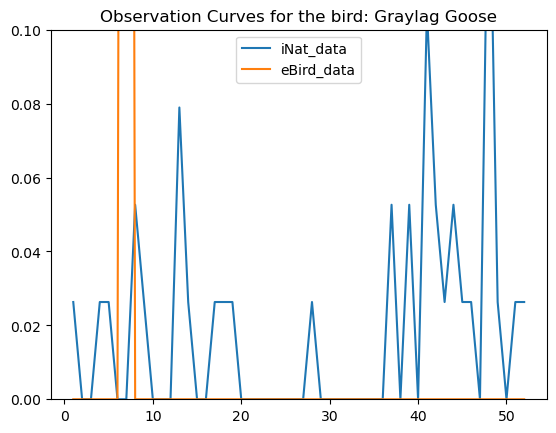

In [313]:
make_discrete_curves("4AED44E8")

In [136]:
import scipy

In [137]:
iNat_curves_discrete.loc["89431E9F", :]

WEEK
1     0.010280
2     0.016822
3     0.010280
4     0.025234
5     0.004673
6     0.007477
7     0.012150
8     0.022430
9     0.009346
10    0.014019
11    0.016822
12    0.016822
13    0.016822
14    0.028037
15    0.023364
16    0.022430
17    0.068224
18    0.041121
19    0.022430
20    0.021495
21    0.026168
22    0.028972
23    0.016822
24    0.017757
25    0.015888
26    0.018692
27    0.019626
28    0.024299
29    0.026168
30    0.020561
31    0.013084
32    0.019626
33    0.014019
34    0.015888
35    0.036449
36    0.025234
37    0.011215
38    0.009346
39    0.018692
40    0.014019
41    0.014953
42    0.015888
43    0.012150
44    0.017757
45    0.014953
46    0.015888
47    0.024299
48    0.012150
49    0.017757
50    0.016822
51    0.014019
52    0.020561
Name: 89431E9F, dtype: float64

In [138]:
scipy.ndimage.gaussian_filter(
    iNat_curves_discrete.loc["89431E9F", :],
    3
)

array([0.01339856, 0.0133622 , 0.01329956, 0.01324141, 0.01324553,
       0.01338154, 0.01371456, 0.01429422, 0.01516504, 0.01638161,
       0.01800673, 0.02007613, 0.02254135, 0.02521543, 0.02776413,
       0.02977156, 0.03087072, 0.0308845 , 0.02989347, 0.0281971 ,
       0.02619122, 0.02424242, 0.02261091, 0.02142949, 0.02071166,
       0.02037047, 0.02025324, 0.02019879, 0.0201016 , 0.01994671,
       0.01979022, 0.01968751, 0.0196262 , 0.01951099, 0.01921684,
       0.01867351, 0.01792058, 0.01709304, 0.01635371, 0.0158239 ,
       0.01555075, 0.01551683, 0.01566725, 0.01593159, 0.0162375 ,
       0.01652389, 0.01675153, 0.01691156, 0.01701955, 0.01709617,
       0.01715185, 0.01718317])

In [139]:
def function_smoothing(x, sigma=3):
    y = scipy.ndimage.gaussian_filter(
        x,
        sigma
    )
    return y


In [242]:
def make_smooth_curves(x, sigma=3):
    aviID = x
    plt.ylim((0,0.1))
    y1_smoothed = function_smoothing(
        iNat_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data')
    plt.plot(y2_smoothed, label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

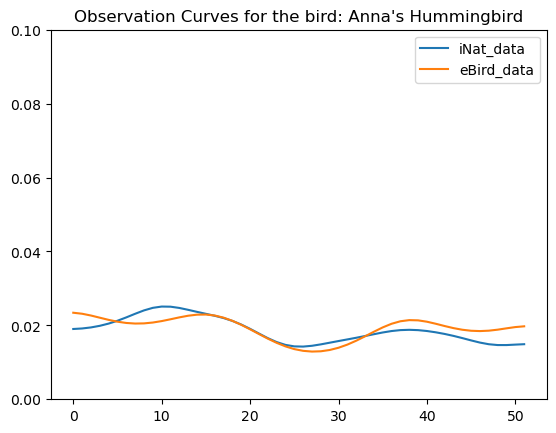

In [312]:
make_smooth_curves("42393721", sigma=3)

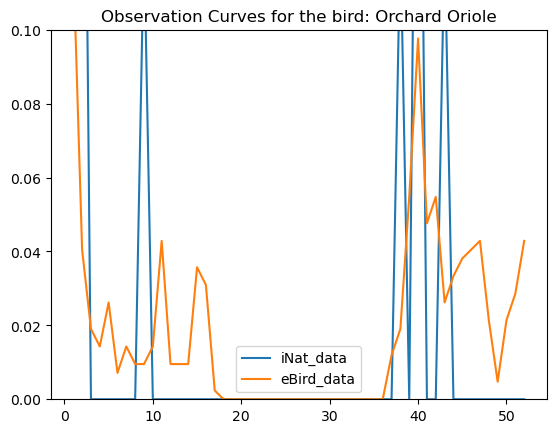

In [244]:
make_discrete_curves("000482C9")

In [144]:
y1 = iNat_curves_discrete.loc["89431E9F", :]

In [145]:
y1[15:20]

WEEK
16    0.022430
17    0.068224
18    0.041121
19    0.022430
20    0.021495
Name: 89431E9F, dtype: float64

In [148]:
y1.values.copy()

array([0.01028037, 0.01682243, 0.01028037, 0.02523364, 0.0046729 ,
       0.00747664, 0.01214953, 0.02242991, 0.00934579, 0.01401869,
       0.01682243, 0.01682243, 0.01682243, 0.02803738, 0.02336449,
       0.02242991, 0.0682243 , 0.0411215 , 0.02242991, 0.02149533,
       0.02616822, 0.02897196, 0.01682243, 0.01775701, 0.01588785,
       0.01869159, 0.01962617, 0.02429907, 0.02616822, 0.02056075,
       0.01308411, 0.01962617, 0.01401869, 0.01588785, 0.0364486 ,
       0.02523364, 0.01121495, 0.00934579, 0.01869159, 0.01401869,
       0.01495327, 0.01588785, 0.01214953, 0.01775701, 0.01495327,
       0.01588785, 0.02429907, 0.01214953, 0.01775701, 0.01682243,
       0.01401869, 0.02056075])

In [149]:
import numpy as np

In [245]:
def make_smooth_curves_rm2wk_iNat(x, sigma=3):
    aviID = x
    plt.ylim((0,0.03))
    y1 = iNat_curves_discrete.loc[aviID, :].values.copy()
    y1[16:18] = np.mean(y1[13:21])
    y1_smoothed = function_smoothing(
        y1,
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data')
    plt.plot(y2_smoothed, label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

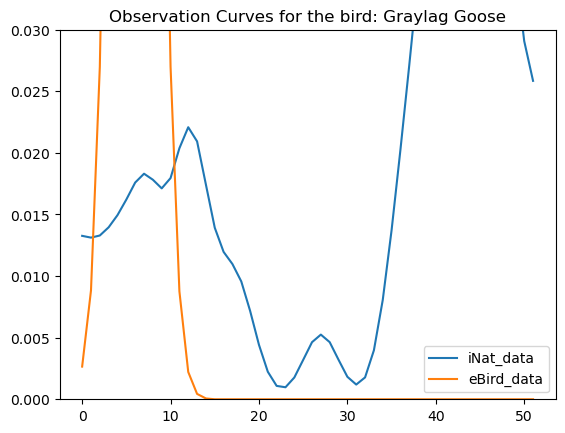

In [315]:
make_smooth_curves_rm2wk_iNat("4AED44E8", sigma=2)

In [153]:
eBird_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.119048,0.040476,0.019048,0.014286,0.026190,0.007143,0.014286,0.009524,0.009524,0.014286,...,0.026190,0.033333,0.038095,0.040476,0.042857,0.021429,0.004762,0.021429,0.028571,0.042857
00124D98,0.022217,0.017285,0.012884,0.018823,0.015717,0.016278,0.016436,0.018622,0.015286,0.017831,...,0.010181,0.012554,0.012022,0.014452,0.013028,0.012022,0.012741,0.018349,0.015386,0.017026
00635FF9,0.014224,0.007715,0.009643,0.014706,0.005304,0.006750,0.009161,0.015670,0.003857,0.007473,...,0.013259,0.010849,0.017840,0.016876,0.013259,0.005786,0.005304,0.016152,0.007956,0.013259
01060BFD,0.021075,0.017118,0.009295,0.021535,0.008927,0.015093,0.011412,0.016934,0.008099,0.009111,...,0.014817,0.019418,0.022731,0.016013,0.017394,0.015553,0.014081,0.015829,0.009387,0.014265
018B3169,0.062974,0.057585,0.037885,0.063984,0.046304,0.040411,0.040579,0.059269,0.036707,0.028456,...,0.009092,0.027277,0.038727,0.031824,0.033002,0.034349,0.034012,0.049167,0.023741,0.041253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.041123,0.026198,0.021083,0.032773,0.021188,0.022231,0.020770,0.029746,0.019100,0.023797,...,0.016282,0.015134,0.019309,0.020248,0.018474,0.010437,0.014925,0.034548,0.023484,0.020562
FD2B0309,0.027732,0.018818,0.016177,0.027567,0.008254,0.007098,0.008749,0.018323,0.003136,0.013701,...,0.013866,0.018983,0.016507,0.022945,0.023440,0.016177,0.008088,0.008584,0.015517,0.014526
FED3756C,0.045327,0.034529,0.028118,0.050163,0.017321,0.025644,0.023394,0.028681,0.020020,0.016871,...,0.013159,0.014059,0.014509,0.023282,0.035429,0.022720,0.016309,0.037454,0.027443,0.032167


In [154]:
iNat_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00124D98,0.011551,0.014851,0.004950,0.021452,0.013201,0.003300,0.004950,0.013201,0.009901,0.014851,...,0.011551,0.011551,0.006601,0.019802,0.004950,0.014851,0.009901,0.008251,0.018152,0.006601
00635FF9,0.010204,0.000000,0.010204,0.010204,0.020408,0.010204,0.020408,0.000000,0.000000,0.020408,...,0.030612,0.020408,0.051020,0.010204,0.000000,0.030612,0.000000,0.020408,0.000000,0.010204
01060BFD,0.019900,0.029851,0.000000,0.029851,0.000000,0.004975,0.024876,0.014925,0.000000,0.004975,...,0.004975,0.014925,0.054726,0.004975,0.029851,0.014925,0.000000,0.019900,0.000000,0.009950
018B3169,0.049587,0.049587,0.016529,0.074380,0.024793,0.024793,0.000000,0.057851,0.000000,0.033058,...,0.008264,0.016529,0.049587,0.041322,0.008264,0.024793,0.016529,0.049587,0.057851,0.057851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.014205,0.008523,0.008523,0.036932,0.028409,0.017045,0.011364,0.019886,0.011364,0.022727,...,0.008523,0.017045,0.008523,0.031250,0.017045,0.005682,0.005682,0.014205,0.019886,0.005682
FD2B0309,0.000000,0.025105,0.033473,0.033473,0.008368,0.012552,0.000000,0.016736,0.000000,0.008368,...,0.037657,0.016736,0.004184,0.020921,0.016736,0.025105,0.004184,0.008368,0.029289,0.008368
FED3756C,0.021739,0.039855,0.014493,0.057971,0.021739,0.010870,0.039855,0.028986,0.010870,0.014493,...,0.021739,0.003623,0.025362,0.025362,0.014493,0.010870,0.010870,0.025362,0.014493,0.043478


In [163]:
eBird_weekly_counts2['COUNTS'].sum()

3842332

In [168]:
freq_ebird_birds = eBird_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/38423.32

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/998403258.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq_ebird_birds = eBird_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/38423.32


In [169]:
iNat_weekly_counts2['COUNTS'].sum()

71565

In [170]:
freq_inat_birds = iNat_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/715.65

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_58934/375797155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq_inat_birds = iNat_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/715.65


In [172]:
freq_ebird_birds.sort_values()

AVIBASEID
4AED44E8    0.000026
A8C34DC9    0.000052
56036504    0.000078
D4540F88    0.000104
1044B438    0.000104
              ...   
36B3872D    2.421889
151C2B3F    2.544080
89431E9F    2.557692
42393721    2.736723
B182DED2    2.874973
Name: COUNTS, Length: 353, dtype: float64

In [317]:
name_avID_dict["B182DED2"]

'Black Phoebe'

In [186]:
a = freq_inat_birds.sort_values()[freq_inat_birds.sort_values() < 0.005].keys()

In [187]:
b = freq_ebird_birds.sort_values()[freq_ebird_birds.sort_values() < 0.005].keys()

In [191]:
remove_birds = set(list(a) + list(b))

In [198]:
all_birds = set(eBird_curves_discrete.index)

In [201]:
all_birds_min_meet =all_birds.difference(remove_birds)

In [202]:
len(all_birds), len(remove_birds), len(all_birds_min_meet)

(353, 76, 277)

In [319]:
list(remove_birds)[0:10]

['E36325FA',
 'B86C504C',
 '9690689D',
 '0B1B2EB6',
 '46B54DB1',
 '115F04DD',
 '11512CF4',
 '8C4CE60F',
 '6D2B5CDA',
 '9BE68BD3']

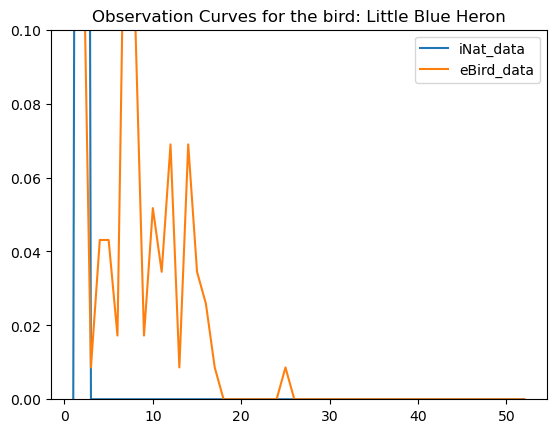

In [326]:
make_discrete_curves("11512CF4")

In [206]:
eBird_curves_discrete2 = eBird_curves_discrete[eBird_curves_discrete.index.isin(all_birds_min_meet)].copy()

In [207]:
iNat_curves_discrete2 = iNat_curves_discrete[iNat_curves_discrete.index.isin(all_birds_min_meet)].copy()

In [208]:
eBird_curves_discrete2

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.119048,0.040476,0.019048,0.014286,0.026190,0.007143,0.014286,0.009524,0.009524,0.014286,...,0.026190,0.033333,0.038095,0.040476,0.042857,0.021429,0.004762,0.021429,0.028571,0.042857
00124D98,0.022217,0.017285,0.012884,0.018823,0.015717,0.016278,0.016436,0.018622,0.015286,0.017831,...,0.010181,0.012554,0.012022,0.014452,0.013028,0.012022,0.012741,0.018349,0.015386,0.017026
00635FF9,0.014224,0.007715,0.009643,0.014706,0.005304,0.006750,0.009161,0.015670,0.003857,0.007473,...,0.013259,0.010849,0.017840,0.016876,0.013259,0.005786,0.005304,0.016152,0.007956,0.013259
01060BFD,0.021075,0.017118,0.009295,0.021535,0.008927,0.015093,0.011412,0.016934,0.008099,0.009111,...,0.014817,0.019418,0.022731,0.016013,0.017394,0.015553,0.014081,0.015829,0.009387,0.014265
018B3169,0.062974,0.057585,0.037885,0.063984,0.046304,0.040411,0.040579,0.059269,0.036707,0.028456,...,0.009092,0.027277,0.038727,0.031824,0.033002,0.034349,0.034012,0.049167,0.023741,0.041253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.041123,0.026198,0.021083,0.032773,0.021188,0.022231,0.020770,0.029746,0.019100,0.023797,...,0.016282,0.015134,0.019309,0.020248,0.018474,0.010437,0.014925,0.034548,0.023484,0.020562
FD2B0309,0.027732,0.018818,0.016177,0.027567,0.008254,0.007098,0.008749,0.018323,0.003136,0.013701,...,0.013866,0.018983,0.016507,0.022945,0.023440,0.016177,0.008088,0.008584,0.015517,0.014526
FED3756C,0.045327,0.034529,0.028118,0.050163,0.017321,0.025644,0.023394,0.028681,0.020020,0.016871,...,0.013159,0.014059,0.014509,0.023282,0.035429,0.022720,0.016309,0.037454,0.027443,0.032167


In [209]:
iNat_curves_discrete2

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00124D98,0.011551,0.014851,0.004950,0.021452,0.013201,0.003300,0.004950,0.013201,0.009901,0.014851,...,0.011551,0.011551,0.006601,0.019802,0.004950,0.014851,0.009901,0.008251,0.018152,0.006601
00635FF9,0.010204,0.000000,0.010204,0.010204,0.020408,0.010204,0.020408,0.000000,0.000000,0.020408,...,0.030612,0.020408,0.051020,0.010204,0.000000,0.030612,0.000000,0.020408,0.000000,0.010204
01060BFD,0.019900,0.029851,0.000000,0.029851,0.000000,0.004975,0.024876,0.014925,0.000000,0.004975,...,0.004975,0.014925,0.054726,0.004975,0.029851,0.014925,0.000000,0.019900,0.000000,0.009950
018B3169,0.049587,0.049587,0.016529,0.074380,0.024793,0.024793,0.000000,0.057851,0.000000,0.033058,...,0.008264,0.016529,0.049587,0.041322,0.008264,0.024793,0.016529,0.049587,0.057851,0.057851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.014205,0.008523,0.008523,0.036932,0.028409,0.017045,0.011364,0.019886,0.011364,0.022727,...,0.008523,0.017045,0.008523,0.031250,0.017045,0.005682,0.005682,0.014205,0.019886,0.005682
FD2B0309,0.000000,0.025105,0.033473,0.033473,0.008368,0.012552,0.000000,0.016736,0.000000,0.008368,...,0.037657,0.016736,0.004184,0.020921,0.016736,0.025105,0.004184,0.008368,0.029289,0.008368
FED3756C,0.021739,0.039855,0.014493,0.057971,0.021739,0.010870,0.039855,0.028986,0.010870,0.014493,...,0.021739,0.003623,0.025362,0.025362,0.014493,0.010870,0.010870,0.025362,0.014493,0.043478


In [210]:
eBird_curves_discrete2_val = eBird_curves_discrete2.values
iNat_curves_discrete2_val = iNat_curves_discrete2.values

In [212]:
eBird_curves_discrete2_val.shape

(277, 52)

In [213]:
iNat_curves_discrete2_val_smoothed = iNat_curves_discrete2_val.copy()

In [214]:
for rn in range(277):
    iNat_curves_discrete2_val_smoothed[rn, 16:18] = \
        np.mean(iNat_curves_discrete2_val_smoothed[rn, 13:21])


In [217]:
avg_iNat_curve = np.mean(iNat_curves_discrete2_val_smoothed, axis=0)

In [218]:
avg_iNat_curve.shape

(52,)

In [219]:
avg_eBird_curve = np.mean(eBird_curves_discrete2_val, axis=0)

In [220]:
avg_eBird_curve.shape

(52,)

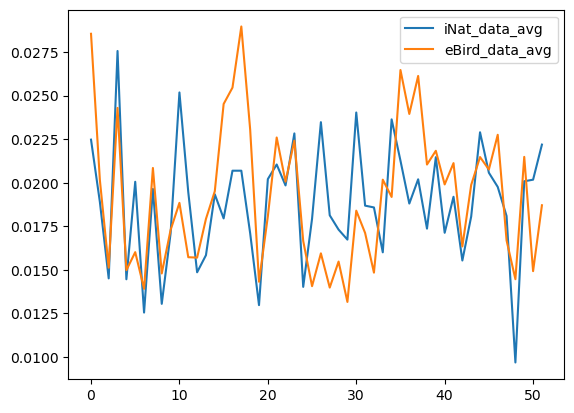

In [221]:
plt.plot(avg_iNat_curve, label='iNat_data_avg')
plt.plot(avg_eBird_curve, label='eBird_data_avg')
plt.legend()

In [228]:
avg_iNat_curve = avg_iNat_curve*(1/0.9792)

In [229]:
sum(avg_iNat_curve)

1.000067843841919

In [230]:
sum(avg_eBird_curve)

0.9999999999999999

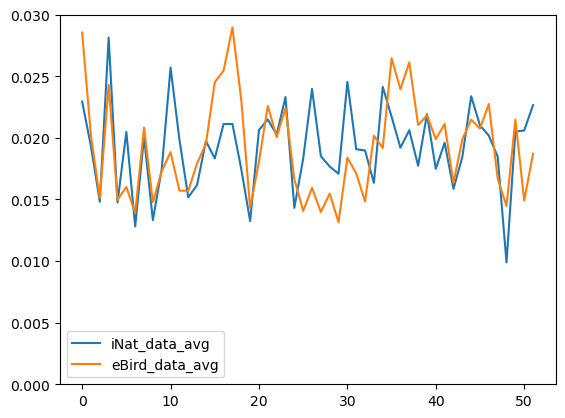

In [327]:
plt.ylim((0,0.03))
plt.plot(function_smoothing(avg_iNat_curve, sigma=0.1), label='iNat_data_avg')
plt.plot(function_smoothing(avg_eBird_curve, sigma=0.1), label='eBird_data_avg')
plt.legend()

In [235]:
from scipy.special import kl_div

In [328]:
(kl_div(avg_iNat_curve, avg_eBird_curve)).sum()

0.017811905009289666

In [249]:
numbering_birds = list(eBird_curves_discrete2.index)

In [250]:
numbering_birds.index("FFF61080")

276

In [253]:
def rm_make_discrete_curves(x):
    aviID = x
    plt.ylim((0,0.1))
    idx = numbering_birds.index(aviID)
    plt.plot(iNat_curves_discrete2_val_smoothed[idx, :], label='iNat_data')
    plt.plot(eBird_curves_discrete2_val[idx, :], label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[aviID]}")

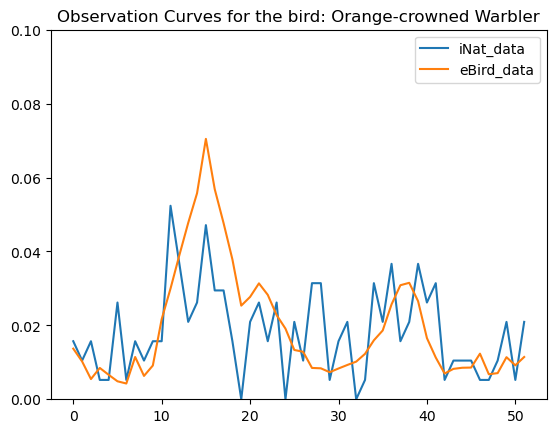

In [254]:
rm_make_discrete_curves("FFF61080")

In [278]:
def rm_make_smooth_curves(x, sigma=(3,3)):
    aviID = x
    plt.ylim((0,0.1))
    idx = numbering_birds.index(aviID)
    y1_smoothed = function_smoothing(
        iNat_curves_discrete2_val_smoothed[idx, :],
        sigma=sigma[0]
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete2_val[idx, :],
        sigma=sigma[1]
    )
    plt.plot(y1_smoothed, label='iNat_data')
    plt.plot(y2_smoothed, label='eBird_data')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

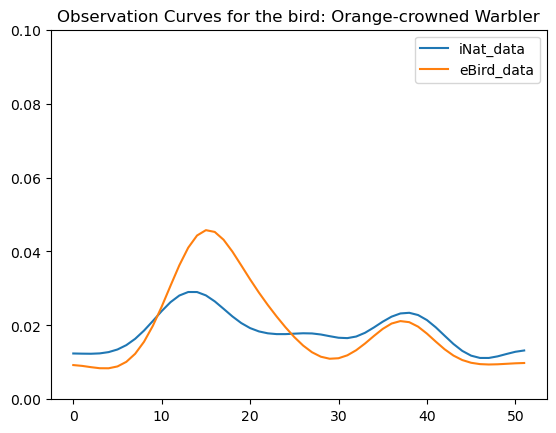

In [279]:
rm_make_smooth_curves("FFF61080")

In [260]:
kl_div_birds_discrete = [ np.mean(kl_div(iNat_curves_discrete2_val_smoothed[i, :], eBird_curves_discrete2_val[i,:])) for i in range(277)]

In [261]:
kl_div_birds_discrete

[0.027860262203060367,
 0.0017741294080098786,
 0.007145485199253134,
 0.005649871029707983,
 0.007207304327143478,
 inf,
 0.010853779833459433,
 0.005317918293000994,
 0.0032752770828258764,
 inf,
 0.004776274797368476,
 0.005486003399473081,
 0.0032761218388327575,
 0.008766810881567192,
 0.003757013122478695,
 inf,
 0.003538983162784645,
 0.004496052471672023,
 0.012543632774884255,
 0.033646590305988364,
 0.008017835199707597,
 0.01885887716080353,
 0.02498723676744741,
 0.013212648653305374,
 0.013440496776713017,
 0.014200338055048473,
 0.0011299861741151697,
 0.004822263508012903,
 0.012519478327674579,
 0.010476967581984992,
 0.024825660470501217,
 0.021951831981337485,
 0.026340902417860794,
 0.06469292233760324,
 0.0034467227049185204,
 0.001961779897841419,
 0.017502365376429282,
 0.003007610876967899,
 0.00733811617446258,
 0.030006584267950102,
 0.003803061602514476,
 0.02419851501108871,
 0.004934831940361187,
 0.0015390645552850063,
 0.001963753713676005,
 0.001494433117

In [265]:
df_kl_div_discrete = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_discrete)))

In [268]:
df_kl_div_discrete.columns = ['AVIBASEID', 'KL_Divergence_Value']

In [271]:
df_kl_div_discrete['COMMON NAME'] = df_kl_div_discrete['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [273]:
df_kl_div_discrete.sort_values(by='KL_Divergence_Value')

,AVIBASEID,KL_Divergence_Value,COMMON NAME
84,42393721,0.000653,Anna's Hummingbird
100,536A5157,0.000853,Red-tailed Hawk
188,AA7901D8,0.000918,Snowy Egret
165,93694BB5,0.000937,Great Blue Heron
139,7E327303,0.000990,Acorn Woodpecker
...,...,...,...
244,E0A04985,inf,Ash-throated Flycatcher
246,E4A5B66A,inf,Sooty Grouse
247,E53FC25C,inf,Swainson's Thrush
193,AF0C7BDE,inf,Long-tailed Duck


In [280]:
def generate_kl_smooth(sigma=(3,3)):
    all_kl = []
    for i in range(277):
        x_smooth = scipy.ndimage.gaussian_filter(
            iNat_curves_discrete2_val_smoothed[i, :],
            sigma=sigma[0]
        )
        y_smooth = scipy.ndimage.gaussian_filter(
            eBird_curves_discrete2_val[i,:],
            sigma=sigma[1]
        )
        kl_div_val = np.mean(kl_div(x_smooth, y_smooth))
        all_kl.append(kl_div_val)
    return all_kl
    

In [282]:
kl_div_birds_smooth = generate_kl_smooth(sigma=(2,2))

In [283]:
kl_div_birds_smooth

[0.006677762714700047,
 0.0004172758959795477,
 0.0013143098646005752,
 0.0011268373789211589,
 0.0023169916510894398,
 0.006874541655820957,
 0.0013358487929553537,
 0.001121916357914427,
 0.0008211623848387021,
 0.01579147562039713,
 0.0011503983530139037,
 0.0020054564607979394,
 0.0009425900559727169,
 0.0012030496770964972,
 0.001104898020424131,
 0.001537105377757541,
 0.0005854368699641995,
 0.0014001643445122728,
 0.003525396349330746,
 0.0075449815204053075,
 0.0017465339612815736,
 0.004817215978340982,
 0.008133768870221637,
 0.00307455476266553,
 0.002094516835659666,
 0.003409200020027454,
 0.0005963086526381428,
 0.0008470833774691996,
 0.002130997972380622,
 0.001121144475704335,
 0.01229084101990126,
 0.011329039899625418,
 0.006312801931774624,
 0.03653207537675382,
 0.0009607161122497887,
 0.00037146575897948123,
 0.004201714698905681,
 0.0006522192240842133,
 0.0006662016570209681,
 0.01341315436401162,
 0.0010612743795298258,
 0.005363434692602838,
 0.00138257664585

In [284]:
df_kl_div_smooth = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_smooth)))

In [285]:
df_kl_div_smooth.columns = ['AVIBASEID', 'KL_Divergence_Value']

In [286]:
df_kl_div_smooth['COMMON NAME'] = df_kl_div_smooth['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [287]:
df_kl_div_smooth.sort_values(by='KL_Divergence_Value')

,AVIBASEID,KL_Divergence_Value,COMMON NAME
139,7E327303,0.000168,Acorn Woodpecker
169,951C150C,0.000185,Olive-sided Flycatcher
43,20C2214E,0.000203,American Kestrel
179,A091D50A,0.000209,Northern Harrier
84,42393721,0.000214,Anna's Hummingbird
...,...,...,...
93,4D2FF6F1,inf,Common Tern
109,5BC4E0EF,inf,Willow Flycatcher
227,C5971E25,inf,Rock Sandpiper
244,E0A04985,inf,Ash-throated Flycatcher


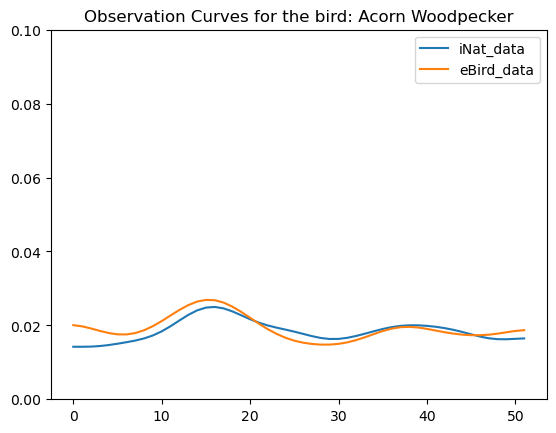

In [288]:
rm_make_smooth_curves("7E327303", sigma=(3,3))

In [289]:
df_kl_div_all = pd.DataFrame(list(zip(numbering_birds,kl_div_birds_smooth, kl_div_birds_discrete)))

In [291]:
df_kl_div_all.columns = ['AVIBASEID', 'KL_DIV_SMOOTH', 'KL_DIV_DISCRETE']

In [293]:
df_kl_div_all['COMMON NAME'] = df_kl_div_all['AVIBASEID'].apply(lambda x: name_avID_dict[x])

In [294]:
df_kl_div_all

,AVIBASEID,KL_DIV_SMOOTH,KL_DIV_DISCRETE,COMMON NAME
0,000482C9,0.006678,0.027860,Orchard Oriole
1,00124D98,0.000417,0.001774,Mourning Dove
2,00635FF9,0.001314,0.007145,Pileated Woodpecker
3,01060BFD,0.001127,0.005650,Western Sandpiper
4,018B3169,0.002317,0.007207,Horned Grebe
...,...,...,...,...
272,FC366114,0.001362,0.003138,Great Horned Owl
273,FD2B0309,0.000918,0.005127,White-faced Ibis
274,FED3756C,0.000760,0.002940,Bald Eagle
275,FF592882,0.000401,0.001474,Chestnut-backed Chickadee


In [305]:
np.sum(df_kl_div_smooth.sort_values(by='KL_Divergence_Value').values[:,1] == np.inf)

7

In [307]:
np.sum(df_kl_div_discrete.sort_values(by='KL_Divergence_Value').values[:,1] == np.inf)

25

# Plots

In [175]:
import seaborn as sns

df_ebird5, inat8

In [183]:
eda_inat1= df_iNat8.groupby('COMMON NAME').count()['taxonID']/716.02

In [186]:
eda_inat1.sort_values(ascending=False)

COMMON NAME
Red-tailed Hawk               3.273652
Anna's Hummingbird            2.698249
Mallard                       2.553001
White-crowned Sparrow         2.150778
Great Egret                   2.147985
                                ...   
Sulphur-bellied Flycatcher    0.001397
Prairie Warbler               0.001397
Flesh-footed Shearwater       0.001397
Eastern Phoebe                0.001397
Yellow-throated Vireo         0.001397
Name: taxonID, Length: 352, dtype: float64

In [191]:
eda_ebird = df_eBird5.groupby('COMMON NAME').count()['AVIBASEID']

In [192]:
eda_ebird = eda_ebird/38423.32

In [193]:
eda_ebird.sort_values(ascending=False)

COMMON NAME
Black Phoebe            2.874973
Anna's Hummingbird      2.736723
House Finch             2.557692
California Scrub-Jay    2.544080
Turkey Vulture          2.421889
                          ...   
Glossy Ibis             0.000104
Helmeted Guineafowl     0.000104
Neotropic Cormorant     0.000078
Indian Peafowl          0.000052
Graylag Goose           0.000026
Name: AVIBASEID, Length: 352, dtype: float64

In [196]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [198]:
import matplotlib.pyplot as plt

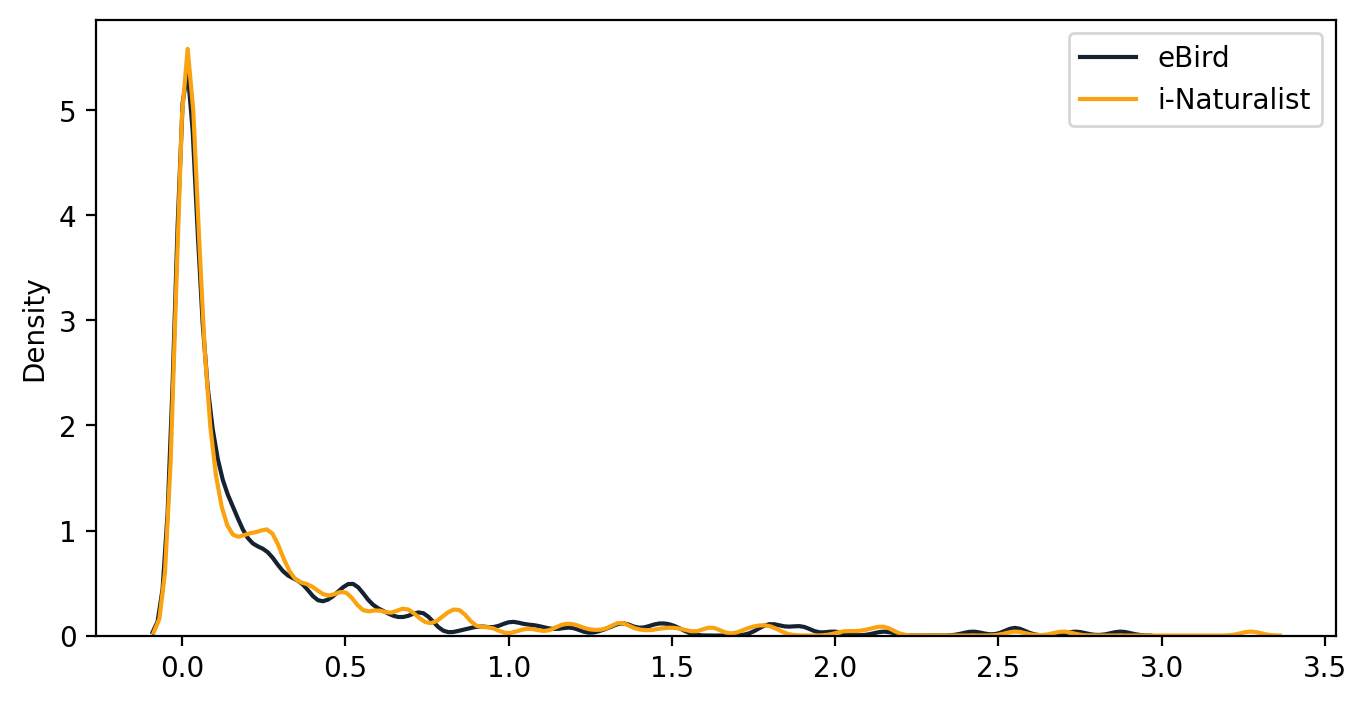

In [216]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.kdeplot(eda_ebird.values, ax=ax, label='eBird', color='#142231', bw_adjust=0.2)
sns.kdeplot(eda_inat1.values, ax=ax, label='i-Naturalist', color='#FBA210', bw_adjust=0.2)
ax.legend()


In [222]:
eda_diff = eda_ebird.sort_index() - eda_inat1.sort_index()

In [224]:
eda_diff.describe()

count    3.520000e+02
mean    -1.009294e-17
std      2.587908e-01
min     -1.470059e+00
25%     -3.255552e-02
50%     -1.088524e-03
75%      3.080370e-02
max      1.195224e+00
dtype: float64

In [226]:
import numpy as np

In [228]:
eda_diff_abs = np.abs(eda_diff)

In [229]:
eda_diff_abs.sort_values(ascending=False)

COMMON NAME
Red-tailed Hawk             1.470059
Wild Turkey                 1.396315
Neotropic Cormorant         1.342063
American Coot               1.272878
European Starling           1.195224
                              ...   
Rough-legged Hawk           0.000107
Great Crested Flycatcher    0.000087
Swamp Sparrow               0.000086
Least Flycatcher            0.000069
Blue Jay                    0.000009
Length: 352, dtype: float64

In [231]:
eda_diff.sort_values()

COMMON NAME
Red-tailed Hawk       -1.470059
Wild Turkey           -1.396315
Neotropic Cormorant   -1.342063
American Coot         -1.272878
Great Blue Heron      -1.020892
                         ...   
Turkey Vulture         0.799029
Mourning Dove          0.963545
Common Raven           0.994793
House Finch            1.060527
European Starling      1.195224
Length: 352, dtype: float64